In [1]:
"""環境"""
# .lab

"""更新履歴"""
# 最終更新日：2025/02/25
# 2025/02/25 os.getcwd()を採用し、__file__を定義する必要をなくした。

"""モジュール読み込み"""
# ファイル操作等
import sys
import os
# from datetime import datetime
from pprint import pprint
import logging
# import pickle
# import struct
from tqdm import tqdm
import h5py
# import threading
import json

# tkinter
from tkinter import filedialog, messagebox, Tk

# データ分析ツール
import pandas as pd
import numpy as np
import scipy as sp
# import math
# from sklearn.linear_model import LinearRegression

# グラフ等作成用
import matplotlib
import matplotlib.pyplot as plt         # 図の作成用
from PIL import Image as im
# import cv2
from IPython.display import display, HTML, clear_output, update_display

# 自作モジュール
sys.path.append(r"C:\Users\okaza\pythonenv")
from modules.Mytools.Tools import print_fileinfo, h5_tree
import modules.Mytools.Settings
import modules.fitXRD as fx
from modules.peakfit import peakfit, pseudoVoigt

"""ログ管理ツール作成"""
# chche directoryの設定
cachedir = os.path.abspath(os.getcwd() + "/.cache")
os.makedirs(cachedir, exist_ok=True)

# loggerの作成
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
format = "%(levelname)-9s  %(asctime)s [%(filename)s:%(lineno)d] %(message)s"

# Streamハンドラクラスを作成
sh = logging.StreamHandler()
sh.setLevel(logging.DEBUG)
sh.setFormatter(logging.Formatter(format))
logger.addHandler(sh)

# Fileハンドラクラスをインスタンス化
logfile = cachedir + ""
fh = logging.FileHandler(filename=cachedir + "/notebook.log", encoding="utf-8")
fh.setLevel(logging.DEBUG)
fh.setFormatter(logging.Formatter(format))
logger.addHandler(fh)
logger.debug("[Activate workspace]: " + os.getcwd())
logger.debug("[Set cache]: "+ os.path.abspath(cachedir))
logger.debug("[Activate log]: " + os.path.abspath(cachedir + "/notebook.log"))

# jsonファイルを作成
with open(cachedir + "/config.json", mode = "w") as f:
    json.dump(dict(), f)
logger.debug("[Activate json]: " + os.path.abspath(cachedir + "/config.json"))

# imgファイルを作成
im.fromarray(np.zeros((1,1)).astype(np.int32)).save(cachedir + "/img.png")
logger.debug("[Activate png]: " + os.path.abspath(cachedir + "/img.png"))

DEBUG      2025-05-15 19:28:00,819 [1674221980.py:68] [Activate workspace]: c:\Users\okaza\pythonenv\figures\text
DEBUG      2025-05-15 19:28:00,821 [1674221980.py:69] [Set cache]: c:\Users\okaza\pythonenv\figures\text\.cache
DEBUG      2025-05-15 19:28:00,822 [1674221980.py:70] [Activate log]: c:\Users\okaza\pythonenv\figures\text\.cache\notebook.log
DEBUG      2025-05-15 19:28:00,823 [1674221980.py:75] [Activate json]: c:\Users\okaza\pythonenv\figures\text\.cache\config.json
DEBUG      2025-05-15 19:28:00,876 [1674221980.py:79] [Activate png]: c:\Users\okaza\pythonenv\figures\text\.cache\img.png


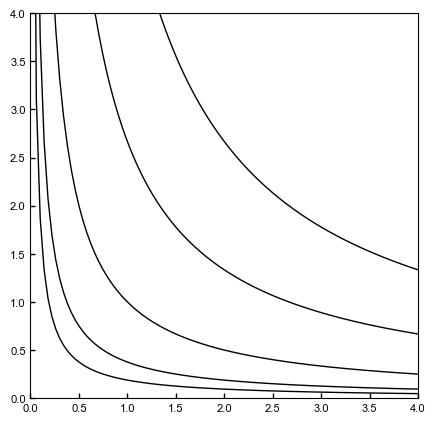

In [ ]:
def ideal():

    v = np.linspace(1/50,4,100)
    t = np.array([3/16, 3/8, 1, 8/3, 16/3])
    _p = np.meshgrid(v,t)
    p = np.reciprocal(_p[0])*_p[1]

    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)

    for i in p:
        ax.plot(
            v,
            i,
            lw = 1,
            c = "0",
        )
    plt.show()
    plt.close()



    return
ideal()
del ideal

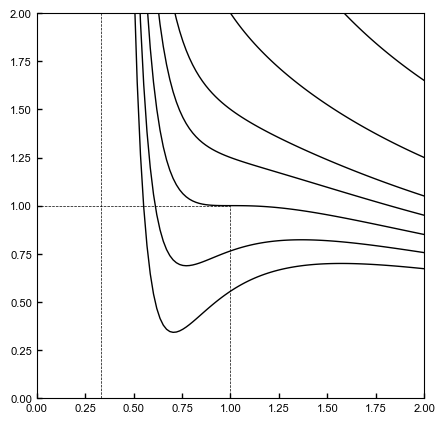

In [46]:
def von():

    v = np.linspace(1/3+1e-9, 2, 100)
    t = [8/9, 16/17, 1, 17/16, 9/8, 5/4, 3/2, 2]

    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)

    for i in t:
        ax.plot(
            v,
            (8*v**2 *i -9*v + 3)/(v**2*(3*v-1)),
            lw = 1,
            c = "0",
        )
    
    ax.plot(
        [0,1,1],
        [1,1,0],
        lw = 0.5,
        ls = "dashed",
        c = "0"
    )
    ax.plot(
        [1/3]*2,
        ax.get_ylim(),
        lw = 0.5,
        ls = "dashed",
        c = "0"
    )
    plt.show()
    plt.close()


    return
von()
del von